In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import seaborn as sns

from documents import Document, Corpus, Sentence
%load_ext autoreload
%autoreload 2

In [2]:
# Instantiate a corpus object which reads in all .txt files in a directory
path_to_writing_folder = "/Users/mbarry/Documents/03_hobbies/writing/prose/essays"
corpus = Corpus(path_to_writing_folder)

There are 55 documents in the corpus
There are 27023 words in the corpus


In [3]:
print(f"There are {corpus.document_count} documents in the corpus")

There are 55 documents in the corpus


# Tokenizing the corpus and counting words

In [4]:
corpus.tokenize_corpus()

all_words = FreqDist(corpus.document_tokens)
all_words.most_common(10)

[('i', 2375),
 ('to', 969),
 ('the', 815),
 ('a', 646),
 ('that', 566),
 ('of', 487),
 ('my', 470),
 ('was', 449),
 ('it', 412),
 ('and', 410)]

In [5]:
# View most common words without stop words
corpus.tokenize_corpus(remove_stop_words=True)
all_words = FreqDist(corpus.document_tokens)
all_words.most_common(10)

[('feel', 182),
 ('like', 160),
 ('would', 138),
 ('able', 114),
 ('good', 108),
 ('life', 95),
 ('really', 95),
 ('think', 83),
 ('way', 82),
 ('father', 81)]

In [6]:
document_lengths = [len(doc) for doc in corpus.documents.values()]


(array([40.,  7.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([    0. ,  2586.9,  5173.8,  7760.7, 10347.6, 12934.5, 15521.4,
        18108.3, 20695.2, 23282.1, 25869. ]),
 <BarContainer object of 10 artists>)

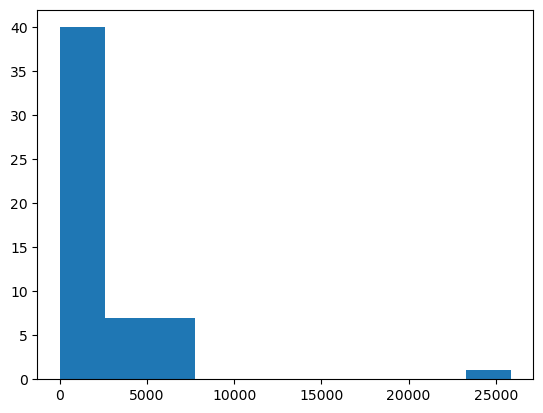

In [7]:
fig, ax = plt.subplots()
ax.hist(document_lengths)

# Sentences 

In [8]:
example_sentence = "This is an example sentence, with a comma."

sentence = Sentence(example_sentence)

In [9]:
# The sentence class creates a list of tokens
sentence.word_tokens

['This', 'is', 'an', 'example', 'sentence', 'with', 'a', 'comma']

In [10]:
# All punctuation are stored in the punctuation mark list
sentence.punctuation_marks

[',', '.']

In [11]:
# Type of sentence is determined by the last punctuation mark
sentence.type_of_sentence

'declarative'

# Document Class

In [17]:
path_to_journal = "../writing/sample_journal.txt"
document = Document(path_to_journal)

The document class reads in the document in it's entirety and stores it in the document_string attribute.

In [18]:
document.document_string

"# March 5th, 2023  I am excited about the Sentence class I coded today.  It seems like it could be a useful tool to help writers explore granular aspects of their writing. It is fun making choices about what parts of a sentence are important, and what attributes a Sentence class should have.  I am a bit worried that I am overengineering this project.  Even if it is, it is good practice in organization.  It is interesting to think about natural language components as Python objects.  # March 8th, 2023  I am excited about having a set of classes that inherit the properties of the Document class.  I will have a journal class which has time-based sentiment analysis.  I will have an essay class which will have a property of a document length goal, as well as a method to identify repeated phrases and ideas.  I will have a poem class which describes number of lines, and perhaps common phonemes.  I wonder if I am actually going to finish this project, or at least get an MVP completed.  I have

On instantiation, the document object creates sentence objects which allow for easy exploration of the word attributes.

In [19]:
document.sentences[0].sentence_string

'# March 5th, 2023  I am excited about the Sentence class I coded today.'

# Document Length 

# Cumulative Count

In [21]:
cumulative_word_count = document.cumulative_word_count()

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 30,
 31,
 32,
 33,
 34,
 34,
 35,
 36,
 36,
 36,
 37,
 38,
 39,
 40,
 40,
 41,
 41,
 41,
 41,
 42,
 43,
 43,
 43,
 43,
 44,
 45,
 46,
 46,
 46,
 47,
 48,
 49,
 50,
 51,
 51,
 51,
 51,
 51,
 52,
 53,
 54,
 55,
 55,
 55,
 56,
 56,
 57,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 63,
 64,
 64,
 64,
 64,
 64,
 64,
 65,
 65,
 66,
 66,
 67,
 67,
 68,
 68,
 69,
 69,
 69,
 70,
 70,
 70,
 71,
 71,
 71,
 72,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 78,
 78,
 78,
 79,
 80,
 80,
 80,
 80,
 80,
 80,
 81,
 81,
 81,
 82,
 83,
 84,
 84,
 85,
 85,
 85,
 86,
 86,
 87,
 88,
 89,
 89,
 90,
 90,
 90,
 90,
 90,
 91,
 91,
 91,
 92,
 93,
 93,
 94,
 94,
 95,
 96,
 97,
 97,
 98,
 98,
 98,
 98,
 99,
 100,
 100,
 101,
 101,
 101,
 102,
 103,
 104,
 105,
 105,
 106,
 107,
 107,
 107,
 107,
 108,
 108,
 108,
 108,
 109,
 110,
 111,
 112,
 112,
 113,
 113,
 114,
 115,
 115,
 115,
 115

In [ ]:
fig, ax = plt.subplots()

ax.plot(
    range(len(cumulative_word_count)),
    cumulative_word_count
    
)